In [1]:
import pandas as pd
import os
from google.colab import files

In [2]:
uploaded = files.upload()

Saving expanded_transactions.json to expanded_transactions.json


In [3]:
import json

# Load the JSON data from the uploaded file
file_path = 'expanded_transactions.json'

with open(file_path, 'r') as file:
    transactions_data = json.load(file)

# Displaying the structure of the first few records to understand the data format
sample_data = transactions_data[:5]  # Displaying first 5 records as a sample
sample_data


[{'account_id': 'y7LjWZRj1phnobb8gGg1HJrZVMANE8c4ZdNeM',
  'account_owner': None,
  'amount': 25,
  'authorized_date': '2023-09-26',
  'authorized_datetime': None,
  'category': ['Payment', 'Credit Card'],
  'category_id': '16001000',
  'check_number': None,
  'counterparties': [],
  'date': '2023-09-27',
  'datetime': None,
  'iso_currency_code': 'USD',
  'location': {'address': None,
   'city': None,
   'country': None,
   'lat': None,
   'lon': None,
   'postal_code': None,
   'region': None,
   'store_number': None},
  'logo_url': None,
  'merchant_entity_id': None,
  'merchant_name': None,
  'name': 'CREDIT CARD 3333 PAYMENT *//',
  'payment_channel': 'other',
  'payment_meta': {'by_order_of': None,
   'payee': None,
   'payer': None,
   'payment_method': None,
   'payment_processor': None,
   'ppd_id': None,
   'reason': None,
   'reference_number': None},
  'pending': False,
  'pending_transaction_id': None,
  'personal_finance_category': {'confidence_level': 'HIGH',
   'detaile

In [4]:
# Replacing 'account_owner' with a placeholder based on 'account_id'

# Creating a mapping from account_id to a placeholder name
account_ids = set([transaction['account_id'] for transaction in transactions_data])
account_owner_placeholder = {account_id: f"User_{idx+1}" for idx, account_id in enumerate(account_ids)}

# Updating the 'account_owner' field in the data
for transaction in transactions_data:
    transaction['account_owner'] = account_owner_placeholder[transaction['account_id']]

# Displaying the structure of the first few records after modification
modified_sample_data = transactions_data[:5]  # Displaying first 5 records as a sample
modified_sample_data


[{'account_id': 'y7LjWZRj1phnobb8gGg1HJrZVMANE8c4ZdNeM',
  'account_owner': 'User_1145',
  'amount': 25,
  'authorized_date': '2023-09-26',
  'authorized_datetime': None,
  'category': ['Payment', 'Credit Card'],
  'category_id': '16001000',
  'check_number': None,
  'counterparties': [],
  'date': '2023-09-27',
  'datetime': None,
  'iso_currency_code': 'USD',
  'location': {'address': None,
   'city': None,
   'country': None,
   'lat': None,
   'lon': None,
   'postal_code': None,
   'region': None,
   'store_number': None},
  'logo_url': None,
  'merchant_entity_id': None,
  'merchant_name': None,
  'name': 'CREDIT CARD 3333 PAYMENT *//',
  'payment_channel': 'other',
  'payment_meta': {'by_order_of': None,
   'payee': None,
   'payer': None,
   'payment_method': None,
   'payment_processor': None,
   'ppd_id': None,
   'reason': None,
   'reference_number': None},
  'pending': False,
  'pending_transaction_id': None,
  'personal_finance_category': {'confidence_level': 'HIGH',
   '

In [7]:
import pandas as pd

# Converting the modified transactions data to a DataFrame for easier handling and exporting
transactions_df = pd.DataFrame(transactions_data)

# Exporting the modified data to a new JSON file
modified_file_path = '/modified_transactions.json'
transactions_df.to_json(modified_file_path, orient='records', lines=True)

modified_file_path


'/modified_transactions.json'

In [8]:
# Starting with data cleaning and preprocessing

# Importing necessary libraries
import pandas as pd

# Loading the modified dataset
transactions_df = pd.read_json(modified_file_path, lines=True)

# Displaying the first few rows of the dataset for a quick overview
transactions_df.head()


,account_id,account_owner,amount,authorized_date,authorized_datetime,category,category_id,check_number,counterparties,date,...,payment_meta,pending,pending_transaction_id,personal_finance_category,personal_finance_category_icon_url,transaction_code,transaction_id,transaction_type,unofficial_currency_code,website
0,y7LjWZRj1phnobb8gGg1HJrZVMANE8c4ZdNeM,User_1145,25.00,2023-09-26,NaN,"[Payment, Credit Card]",16001000,NaN,[],2023-09-27,...,"{'by_order_of': None, 'payee': None, 'payer': ...",False,NaN,"{'confidence_level': 'HIGH', 'detailed': 'LOAN...",https://plaid-category-icons.plaid.com/PFC_LOA...,NaN,q3PB1aoBkQhJ1gg9yey8C5pZvwg1mjtg3Brdq,special,NaN,None
1,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,5.40,2023-09-26,NaN,"[Travel, Taxi]",22016000,NaN,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-27,...,"{'by_order_of': None, 'payee': None, 'payer': ...",False,NaN,"{'confidence_level': 'VERY_HIGH', 'detailed': ...",https://plaid-category-icons.plaid.com/PFC_TRA...,NaN,xj1PWZmPMJUJEbb6jojlCZWBXr8ewEc6bL4XV,special,NaN,uber.com
2,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,-500.00,2023-09-25,NaN,"[Travel, Airlines and Aviation Services]",22001000,NaN,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-25,...,"{'by_order_of': None, 'payee': None, 'payer': ...",False,NaN,"{'confidence_level': 'VERY_HIGH', 'detailed': ...",https://plaid-category-icons.plaid.com/PFC_TRA...,NaN,dLvp3A9pbrsnR44y8G8dHBwAgJNjL6tJprEda,special,NaN,united.com
3,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,12.00,2023-09-24,NaN,"[Food and Drink, Restaurants, Fast Food]",13005032,NaN,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-24,...,"{'by_order_of': None, 'payee': None, 'payer': ...",False,NaN,"{'confidence_level': 'VERY_HIGH', 'detailed': ...",https://plaid-category-icons.plaid.com/PFC_FOO...,NaN,aZvMrLGMDlsW7xxneQeZukJGNwQBzvcZMV5bD,place,NaN,mcdonalds.com
4,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,4.33,2023-09-24,NaN,"[Food and Drink, Restaurants, Coffee Shop]",13005043,NaN,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-24,...,"{'by_order_of': None, 'payee': None, 'payer': ...",False,NaN,"{'confidence_level': 'VERY_HIGH', 'detailed': ...",https://plaid-category-icons.plaid.com/PFC_FOO...,NaN,4RNKkgdKmPIZl11LxrxkHXWrML6ge8cJP4bqR,place,NaN,starbucks.com


In [9]:
# Checking for missing values in each column
missing_values = transactions_df.isnull().sum()

# Displaying the count of missing values for each column
missing_values_count = pd.DataFrame(missing_values, columns=['Missing Values'])
missing_values_count[missing_values_count['Missing Values'] > 0]


,Missing Values
authorized_datetime,2274
check_number,2274
datetime,2274
logo_url,857
merchant_entity_id,857
merchant_name,43
pending_transaction_id,2274
transaction_code,2274
unofficial_currency_code,2274
website,857


In [10]:
# Dropping columns with less relevance to the recommender system
columns_to_drop = ['logo_url', 'merchant_entity_id', 'website']
transactions_df.drop(columns=columns_to_drop, inplace=True)

# Handling missing values in 'merchant_name' by filling them with a placeholder 'Unknown'
transactions_df['merchant_name'].fillna('Unknown', inplace=True)

# For columns with high missing values, we'll fill them with appropriate placeholders or derived values
# Filling missing datetime related fields with the 'date' field
transactions_df['authorized_datetime'].fillna(transactions_df['date'], inplace=True)
transactions_df['datetime'].fillna(transactions_df['date'], inplace=True)

# Filling other fields with a generic placeholder
generic_placeholder = "Not Available"
columns_with_high_missing_values = ['check_number', 'pending_transaction_id', 'transaction_code', 'unofficial_currency_code']
for column in columns_with_high_missing_values:
    transactions_df[column].fillna(generic_placeholder, inplace=True)

# Checking the dataset after these changes
transactions_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   account_id                          2274 non-null   object        
 1   account_owner                       2274 non-null   object        
 2   amount                              2274 non-null   float64       
 3   authorized_date                     2274 non-null   object        
 4   authorized_datetime                 2274 non-null   datetime64[ns]
 5   category                            2274 non-null   object        
 6   category_id                         2274 non-null   int64         
 7   check_number                        2274 non-null   object        
 8   counterparties                      2274 non-null   object        
 9   date                                2274 non-null   datetime64[ns]
 10  datetime                

In [11]:
# Unpacking Nested Fields and Feature Engineering

# Unpacking the 'location' field (extracting city, country, etc.)
location_data = pd.json_normalize(transactions_df['location'])
location_data.columns = ['location_' + col for col in location_data.columns]  # Prefixing column names

# Unpacking 'personal_finance_category'
personal_finance_category_data = pd.json_normalize(transactions_df['personal_finance_category'])
personal_finance_category_data.columns = ['pfc_' + col for col in personal_finance_category_data.columns]

# Dropping the original nested columns from the dataframe
transactions_df.drop(columns=['location', 'personal_finance_category'], inplace=True)

# Merging the unpacked data back into the main dataframe
transactions_df = pd.concat([transactions_df, location_data, personal_finance_category_data], axis=1)

# Feature Engineering: Extracting day of the week from transaction date
transactions_df['day_of_week'] = transactions_df['date'].dt.day_name()

# Sample of the dataset after unpacking and adding new features
transactions_df.head()


,account_id,account_owner,amount,authorized_date,authorized_datetime,category,category_id,check_number,counterparties,date,...,location_country,location_lat,location_lon,location_postal_code,location_region,location_store_number,pfc_confidence_level,pfc_detailed,pfc_primary,day_of_week
0,y7LjWZRj1phnobb8gGg1HJrZVMANE8c4ZdNeM,User_1145,25.00,2023-09-26,2023-09-27,"[Payment, Credit Card]",16001000,Not Available,[],2023-09-27,...,None,None,None,None,None,None,HIGH,LOAN_PAYMENTS_CREDIT_CARD_PAYMENT,LOAN_PAYMENTS,Wednesday
1,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,5.40,2023-09-26,2023-09-27,"[Travel, Taxi]",22016000,Not Available,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-27,...,None,None,None,None,None,None,VERY_HIGH,TRANSPORTATION_TAXIS_AND_RIDE_SHARES,TRANSPORTATION,Wednesday
2,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,-500.00,2023-09-25,2023-09-25,"[Travel, Airlines and Aviation Services]",22001000,Not Available,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-25,...,None,None,None,None,None,None,VERY_HIGH,TRAVEL_FLIGHTS,TRAVEL,Monday
3,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,12.00,2023-09-24,2023-09-24,"[Food and Drink, Restaurants, Fast Food]",13005032,Not Available,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-24,...,None,None,None,None,None,3322,VERY_HIGH,FOOD_AND_DRINK_FAST_FOOD,FOOD_AND_DRINK,Sunday
4,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,4.33,2023-09-24,2023-09-24,"[Food and Drink, Restaurants, Coffee Shop]",13005043,Not Available,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-24,...,None,None,None,None,None,None,VERY_HIGH,FOOD_AND_DRINK_COFFEE,FOOD_AND_DRINK,Sunday


In [12]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical columns for one-hot encoding
categorical_columns = ['category', 'day_of_week', 'payment_channel', 'transaction_type', 'pfc_primary']

# Since 'category' is a list, it needs special handling
# We'll transform each category into a string first
transactions_df['category_str'] = transactions_df['category'].apply(lambda x: ','.join(x))

# One-hot encoding the categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(transactions_df[categorical_columns + ['category_str']])

# Creating a DataFrame from the encoded data
encoded_columns = encoder.get_feature_names_out(categorical_columns + ['category_str'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Merging the encoded data back into the main dataframe
transactions_df = pd.concat([transactions_df, encoded_df], axis=1)

# Dropping the original categorical columns
transactions_df.drop(columns=categorical_columns + ['category_str'], inplace=True)

# Sample of the dataset after encoding
transactions_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: ignored

In [13]:
# Adjusting the 'category' field for one-hot encoding
transactions_df['category_str'] = transactions_df['category'].apply(lambda x: ','.join(x))

# Updating the categorical columns list
categorical_columns_updated = ['day_of_week', 'payment_channel', 'transaction_type', 'pfc_primary', 'category_str']

# One-hot encoding the updated categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(transactions_df[categorical_columns_updated])

# Creating a DataFrame from the encoded data
encoded_columns = encoder.get_feature_names_out(categorical_columns_updated)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Merging the encoded data back into the main dataframe
transactions_df_encoded = pd.concat([transactions_df, encoded_df], axis=1)

# Dropping the original categorical columns and the intermediate 'category_str' column
transactions_df_encoded.drop(columns=categorical_columns_updated + ['category'], inplace=True)

# Displaying a sample of the dataset after encoding
transactions_df_encoded.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,account_id,account_owner,amount,authorized_date,authorized_datetime,category_id,check_number,counterparties,date,datetime,...,pfc_primary_TRAVEL,"category_str_Food and Drink,Restaurants","category_str_Food and Drink,Restaurants,Coffee Shop","category_str_Food and Drink,Restaurants,Fast Food","category_str_Payment,Credit Card","category_str_Shops,Retail","category_str_Transfer,Payroll","category_str_Travel,Airlines","category_str_Travel,Airlines and Aviation Services","category_str_Travel,Taxi"
0,y7LjWZRj1phnobb8gGg1HJrZVMANE8c4ZdNeM,User_1145,25.00,2023-09-26,2023-09-27,16001000,Not Available,[],2023-09-27,2023-09-27,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,5.40,2023-09-26,2023-09-27,22016000,Not Available,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-27,2023-09-27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,-500.00,2023-09-25,2023-09-25,22001000,Not Available,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-25,2023-09-25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,12.00,2023-09-24,2023-09-24,13005032,Not Available,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-24,2023-09-24,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mKdqXBwqxPsag11rBNBAfljEGLnpb4tgljqzr,User_1927,4.33,2023-09-24,2023-09-24,13005043,Not Available,"[{'confidence_level': 'VERY_HIGH', 'entity_id'...",2023-09-24,2023-09-24,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


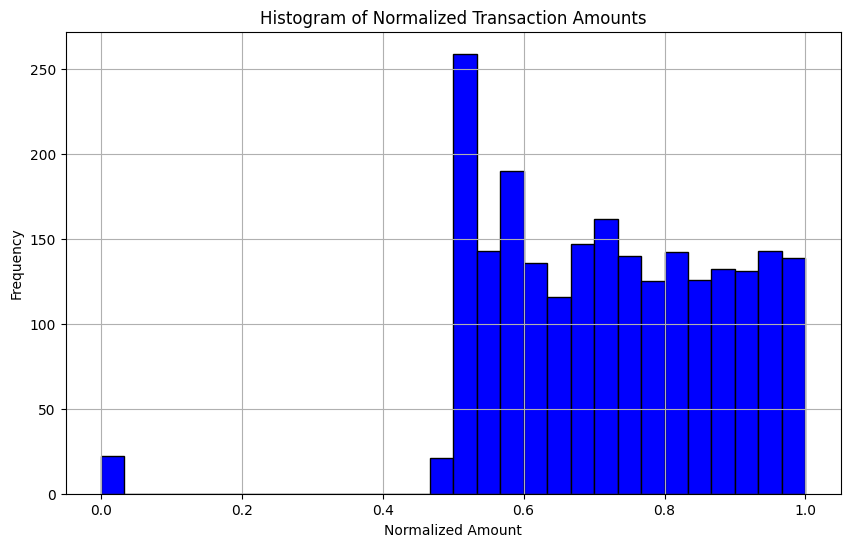

count    2274.000000
mean        0.723036
std         0.166706
min         0.000000
25%         0.589424
50%         0.720749
75%         0.859087
max         1.000000
Name: amount, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Normalization of numerical fields
# We'll normalize the 'amount' field as an example

# Selecting the numerical column for normalization
numerical_column = ['amount']

# Applying Min-Max Scaler for normalization
scaler = MinMaxScaler()
transactions_df_encoded[numerical_column] = scaler.fit_transform(transactions_df_encoded[numerical_column])

# Displaying descriptive statistics for the normalized 'amount' column
normalized_amount_stats = transactions_df_encoded['amount'].describe()

# Displaying a histogram of the normalized 'amount' column
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(transactions_df_encoded['amount'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Normalized Transaction Amounts')
plt.xlabel('Normalized Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

normalized_amount_stats


<ipython-input-15-0147e768cdde>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transactions_df_encoded['amount'], bins=30)


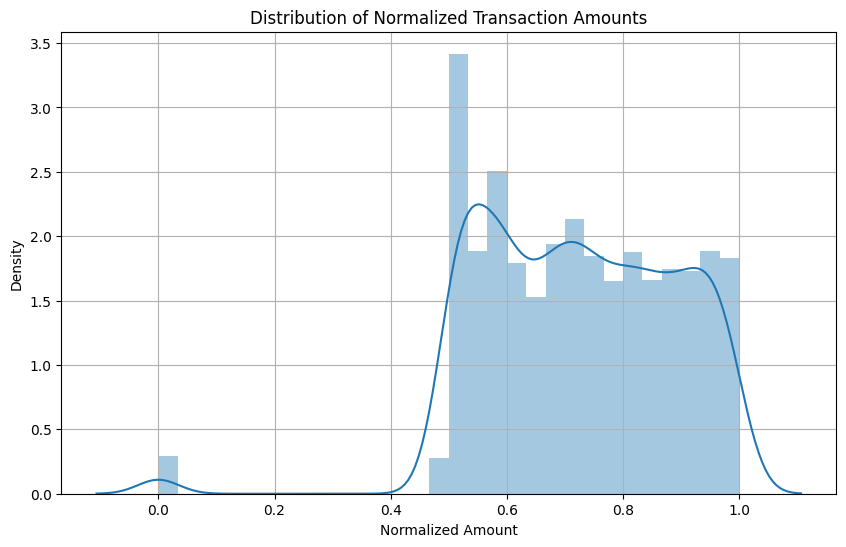

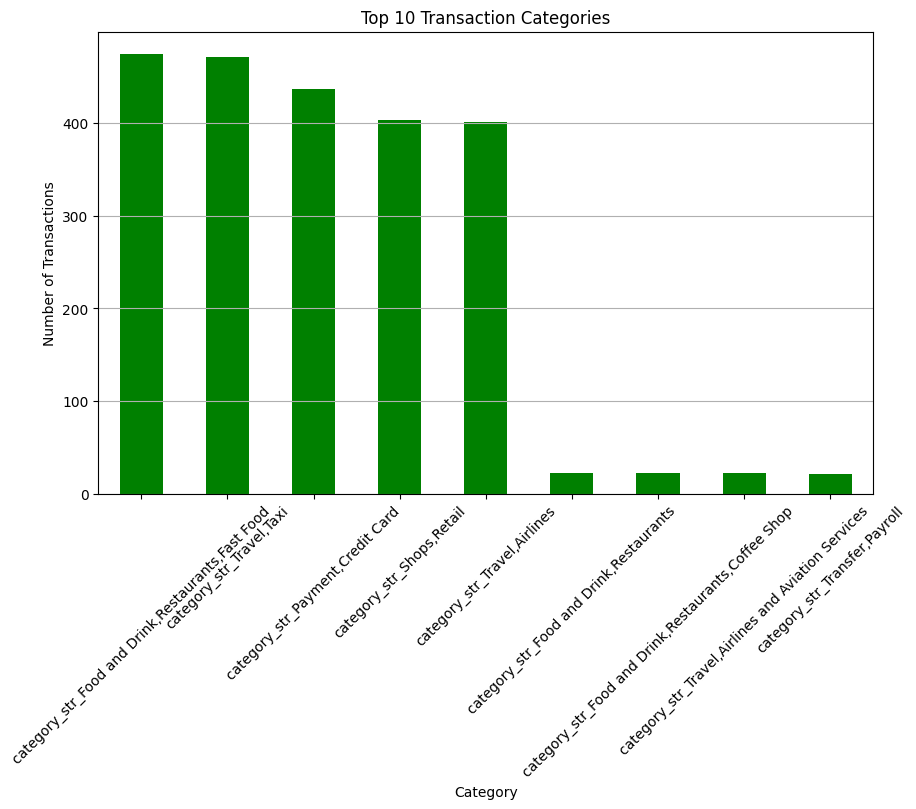

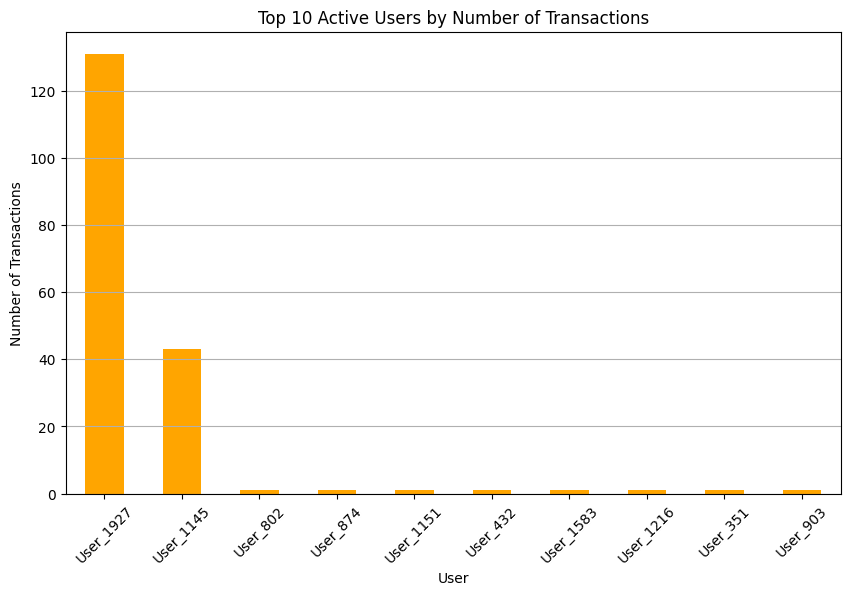

(count    2274.000000
 mean        0.723036
 std         0.166706
 min         0.000000
 25%         0.589424
 50%         0.720749
 75%         0.859087
 max         1.000000
 Name: amount, dtype: float64,
 category_str_Food and Drink,Restaurants,Fast Food      475.0
 category_str_Travel,Taxi                               471.0
 category_str_Payment,Credit Card                       437.0
 category_str_Shops,Retail                              403.0
 category_str_Travel,Airlines                           401.0
 category_str_Food and Drink,Restaurants                 22.0
 category_str_Food and Drink,Restaurants,Coffee Shop     22.0
 category_str_Travel,Airlines and Aviation Services      22.0
 category_str_Transfer,Payroll                           21.0
 dtype: float64,
 User_1927    131
 User_1145     43
 User_802       1
 User_874       1
 User_1151      1
 User_432       1
 User_1583      1
 User_1216      1
 User_351       1
 User_903       1
 Name: account_owner, dtype: int64)

In [15]:
import seaborn as sns

# Basic EDA for transaction amounts, categories, and user activity

# EDA 1: Transaction Amounts Analysis
# Descriptive statistics
amount_stats = transactions_df_encoded['amount'].describe()

# Distribution plot for transaction amounts
plt.figure(figsize=(10, 6))
sns.distplot(transactions_df_encoded['amount'], bins=30)
plt.title('Distribution of Normalized Transaction Amounts')
plt.xlabel('Normalized Amount')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# EDA 2: Categories Analysis
# Count of transactions per category (using one of the one-hot encoded category columns as a representative)
category_counts = transactions_df_encoded.filter(like='category_str_').sum().sort_values(ascending=False).head(10)

# Bar plot for top categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='green')
plt.title('Top 10 Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# EDA 3: User Activity Analysis
# Count of transactions per user
user_activity = transactions_df_encoded['account_owner'].value_counts().head(10)

# Bar plot for top active users
plt.figure(figsize=(10, 6))
user_activity.plot(kind='bar', color='orange')
plt.title('Top 10 Active Users by Number of Transactions')
plt.xlabel('User')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

amount_stats, category_counts, user_activity

